In [1]:
import pandas as pd

# Easy

Скачать данные отсюда (кнопка download all снизу):

[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

## Решение

In [63]:
df = pd.read_csv("../hw_data/titanic/train.csv")
print(df.shape)
df.head(1)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [136]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
total_rows = df.shape[0]

При расчете процента детей, пассажиров возраст которых не указан считаем взрослыми

In [82]:
children = df[df["Age"]<18]["Age"].count()
children_ratio = round(children / total_rows * 100, 2)
print("Детей: "+str(children_ratio)+"%")

Детей: 12.68%


In [83]:
males = df[df["Sex"]=="male"]["Sex"].count()
males_ratio = round(males / total_rows * 100, 2)

females = df[df["Sex"]=="female"]["Sex"].count()
females_ratio = round(females / total_rows * 100, 2)

print("Мужчин: "+str(males_ratio)+"%", "Женщин: "+str(females_ratio)+"%", sep="\n")

Мужчин: 64.76%
Женщин: 35.24%


# Normal

Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили. 

Посчитать [корреляцию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) между возрастом и выживаемостью, полом и выживаемостью


## Решение

### Посмотрим, по каким колонкам нет данных:

In [67]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [81]:
age_na = total_rows - df["Age"].count()
cabin_na = total_rows - df["Cabin"].count()
embarked_na = total_rows - df["Embarked"].count()

In [80]:
print("Age NA: "+str(age_na), "Cabin NA: "+str(cabin_na), "Embarked NA: "+str(embarked_na), sep="\n")

Age NA: 177
Cabin NA: 687
Embarked NA: 2


### Гистограмма по возрасту пассажиров

In [43]:
import matplotlib.pyplot as plt

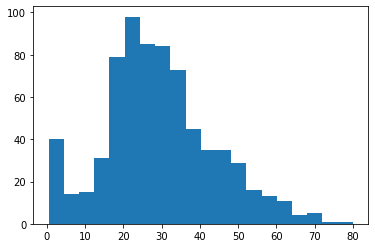

In [47]:
age_hist = plt.hist(df["Age"], bins = 20)

### Выживаемость

In [85]:
children_survive = df[(df["Survived"]==1)&(df["Age"]<18)]["PassengerId"].count()
child_survive_ratio = round(children_survive / children * 100, 2)
print("Выжило детей: "+ str(child_survive_ratio)+ "%")

Выжило детей: 53.98%


In [86]:
male_survive = df[(df["Survived"]==1)&(df["Sex"]=="male")]["PassengerId"].count()
male_survive_ratio = round(male_survive / males * 100, 2)
print("Выжило мужчин: "+ str(male_survive_ratio)+ "%")

Выжило мужчин: 18.89%


In [88]:
female_survive = df[(df["Survived"]==1)&(df["Sex"]=="female")]["PassengerId"].count()
female_survive_ratio = round(female_survive / males * 100, 2)
print("Выжило женщин: "+ str(female_survive_ratio)+ "%")

Выжило женщин: 40.38%


In [107]:
df["isFemale"] = df["Sex"]=="female"
df["isMale"] = df["Sex"]=="male"
df["isChild"] = df["Age"]<18

In [113]:
print("Corr survive / female: " + str(df["Survived"].corr(df["isFemale"])))
print("Corr survive / male: " + str(df["Survived"].corr(df["isMale"])))
print("Corr survive / child: "+ str(df["Survived"].corr(df["isChild"])))

Corr survive / female: 0.5433513806577552
Corr survive / male: -0.543351380657755
Corr survive / child: 0.12223897377570005


# Hard

Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

## Решение

Распределение выживших по классам

<AxesSubplot:>

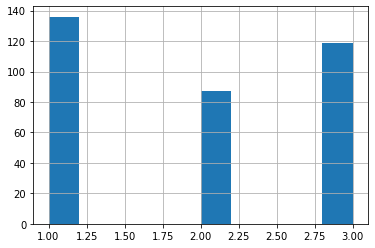

In [267]:
df[(df["Survived"]==1)]["Pclass"].hist()

<AxesSubplot:>

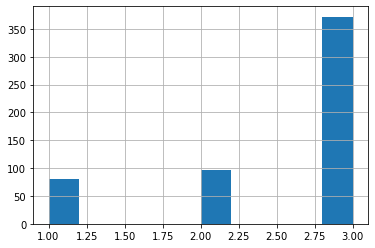

In [268]:
df[(df["Survived"]==0)]["Pclass"].hist()

In [143]:
def survived_by_class(Pclass):
    return df[(df["Pclass"]==Pclass)&(df["Survived"]==1)]["PassengerId"].count() / df[(df["Pclass"]==Pclass)]["PassengerId"].count()
    
    

In [144]:
survived_by_class(1)

0.6296296296296297

In [145]:
survived_by_class(2)

0.47282608695652173

In [146]:
survived_by_class(3)

0.24236252545824846

Распределение выживших по возрастам

<AxesSubplot:>

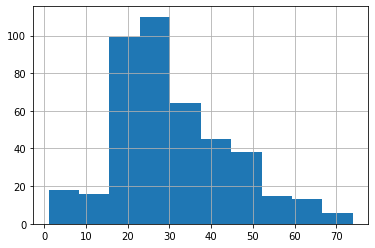

In [228]:
df[(df["Survived"]==0)]["Age"].hist(bins=10)

Весовой расчет по выживаемости, весовые коэффициенты эмпирически из головы

In [251]:
def my_survive(df_row):
    val = 0
    if df_row["Age"]<5:
        val += 20
        
    if df_row["Age"]<10:
        val += 20
        
    if df_row["Age"]<18:
        val += 15

    if df_row["Age"]<30:
        val += 10
        
    if df_row["Age"]>70:
        val += 20
        
    if df_row["Pclass"] == 1:
        val += 40
    
    if df_row["Pclass"] == 2:
        val += 20
        
    if (df_row["Pclass"] == 3)&(df_row["Age"]<40):
        val -= 20
        
    if df_row["Sex"] == 'female':
        val += 40
        
    return 1 if val>50 else 0       
    

Проверим качество модели на учебной выборке

In [248]:
df["Msurvived"] = df.apply(my_survive, axis=1)

In [255]:
df[df["Msurvived"]==df["Survived"]]["PassengerId"].count() / total_rows

0.8013468013468014

Сформируем файл для загрузки на kaggle по тестовой выборке

In [257]:
df_test = pd.read_csv("../hw_data/titanic/test.csv");
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [261]:
df_test["Survived"] = df_test.apply(my_survive, axis=1)

In [264]:
df_test.to_csv("../hw_data/titanic/submit.csv", index=False, columns=["PassengerId", "Survived"])